# Práctica 7 - Gráficos 3D con matplotlib.pyplot
Autor: Claudio Morales D.<br>
https://github.com/cmoralesd/conociendo-python <br>
Otoño 2023<br>
<br>
Para profundizar en las opciones de gráficos 3D, consulte la documentación oficial, disponible en https://matplotlib.org/stable/gallery/mplot3d/index.html

Los archivos de datos en formato **csv** utilizados en esta actividad se obtuvieron desde: https://climatologia.meteochile.gob.cl/application/index/menuTematicoEmas



## 1. Pasando de gráficas 2D a mapas de calor (heat maps)

Los mapas de calor corresponden a una forma gráfica muy útil para representar relaciones entre variables, utilizando un gráfico 2D. El punto de partida para esto es representar los datos en forma de matriz.


In [8]:
# importamos las librerías requeridas
import matplotlib.pyplot as plt   # para construir los gráficos
import meteodatos as mtd   # para obtener los datos a graficar
from matplotlib import cm  # para trabajar con mapas de colores (colormaps)

# cargamos los datos a graficar
datos = mtd.leer_archivo('330075_202304_Temperatura.csv')

El archivo fue leido correctamente: 330075_202304_Temperatura.csv


In [9]:
# comencemos recogiendo los datos a graficar en un arreglo matricial
tmax_mes = []
for d in range(3, 31, 7):
    semana = []
    for i in range(7):
        n = d + i
        dia = '2023-04-'+('0'+str(n) if n<10 else str(n))
        tmax_dia = max(mtd.filtrar_cabecera(mtd.filtrar_dia(datos, dia), 'ts')[1:])
        semana.append(tmax_dia)
    tmax_mes.append(semana)
    
tmax_mes

[[26.6, 30.5, 26.7, 29.9, 32.1, 31.2, 29.6],
 [30.1, 28.2, 21.9, 24.0, 18.0, 21.8, 19.3],
 [20.5, 19.8, 28.5, 29.1, 20.3, 24.8, 22.6],
 [26.4, 29.6, 24.6, 25.1, 19.0, 15.0, 12.2]]

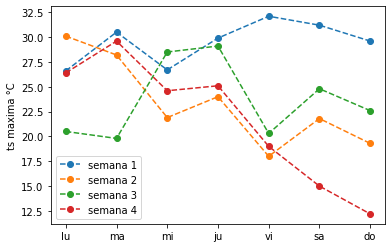

In [10]:
# grafiquemos en 2D
ax = plt.figure().add_subplot()
ax.plot(tmax_mes[0], 'o--', label='semana 1')
ax.plot(tmax_mes[1], 'o--', label='semana 2')
ax.plot(tmax_mes[2], 'o--', label='semana 3')
ax.plot(tmax_mes[3], 'o--', label='semana 4')

ax.set_xticks([0,1,2,3,4,5,6], ['lu','ma','mi','ju','vi','sa','do'])
ax.set_ylabel('ts maxima °C')
ax.legend()
plt.show()

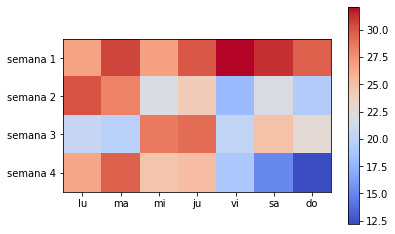

In [11]:
# interpretando la matriz como un mapa de calor
ax = plt.figure().add_subplot()
ax.imshow(tmax_mes, cmap=cm.coolwarm)

ax.set_xticks([0,1,2,3,4,5,6], ['lu','ma','mi','ju','vi','sa','do'])
ax.set_yticks([0,1,2,3],['semana 1','semana 2','semana 3','semana 4'])
plt.colorbar(ax.imshow(tmax_mes, cmap=cm.coolwarm))
plt.show()

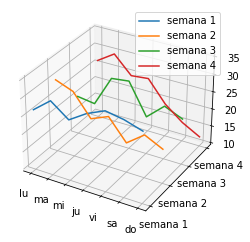

In [12]:
# ahora lo llevamos a un sistema de ejes 3D
ax = plt.figure().add_subplot(projection='3d')

x = [0,1,2,3,4,5,6]
ax.plot(x,tmax_mes[0],zs=0,zdir='y', label='semana 1')
ax.plot(x,tmax_mes[1],zs=1,zdir='y', label='semana 2')
ax.plot(x,tmax_mes[2],zs=2,zdir='y', label='semana 3')
ax.plot(x,tmax_mes[3],zs=3,zdir='y', label='semana 4')

ax.set_xticks([0,1,2,3,4,5,6], ['lu','ma','mi','ju','vi','sa','do'])
ax.set_yticks([0,1,2,3],['semana 1','semana 2','semana 3','semana 4'])
ax.set_zlim(10,35)
ax.legend()
plt.show()

## 2. Explorando algunas opciones para gráficos 3D
Un gráfico de superficie permite relacionar con facilidad dos variables. Si la serie de datos de cada variable puede asociarse fácilmente con un vector, la relación entre dos variables puede considerarse como una matriz de dos dimensiones. La información resultante es posible representarla ahora de distintas maneras: mapa de color, malla (mesh) o superficie.

In [13]:
# importamos la librería numpy, para trabajo con vectores y matrices numéricas
import numpy as np


In [33]:
# definimos los arreglos para los ejes
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 2, 3, 4]

In [34]:
# creamos un meshgrid con los datos de los ejes
X,Y = np.meshgrid(x,y)
Z = np.array(tmax_mes)

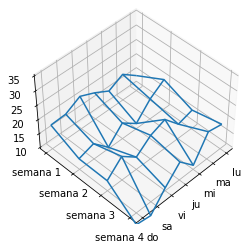

In [44]:
# y graficamos en 3D
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xticks([1,2,3,4,5,6,7], ['lu','ma','mi','ju','vi','sa','do'])
ax.set_yticks([1,2,3,4],['semana 1','semana 2','semana 3','semana 4'])
ax.set_zlim(10,35)
ax.view_init(elev=45,azim=45)
plt.show()

## ACTIVIDAD:




La variación de temperatura **'delta'**, para cada día, se calcula como **tmax - tmin**, donde **tmax** es la temperatura máxima registrada en el día y **tmin** es la temperatura mínima.

Se tiene una serie de datos que ya han sido recogidos desde la base de datos de la estación meteorológica. La variación **delta** para cada día del mes ya se encuentra almacenado en una variable ```delta_mes```, con cuatro filas y siete columnas, que representan, respectivamente, las cuatro semanas completas del mes y los siete días de cada semana. Un gráfico de línea se ha construido como referencia.

A partir de esta información, construir un mapa de color y un gráfico 3D para representar la variación de temperatura **'delta'**, a partir de los datos disponibles. Proceda de la siguiente manera:

1. Construya un **mapa de calor** (heatmap) utilizando **imshow** para los valores de ```delta_mes```. Incluya etiquetas descriptivas en los ejes. Agregue una barra de color (**colorbar**), ajustando sus opciones para mejorar la visualización del gráfico (revise este enlace para una documentación detallada de las opciones de colorbar: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar)
2. Construya un gráfico 3D para representar la misma información del mapa de calor. Defina el eje-x para representar los días de la semana y el eje-y para representar las semanas del mes. Transforme los valores de los ejes en elementos matriciales mediante la función **meshgrid** de **numpy** y utilícelos para crear en el tipo de gráfico 3D que considere más adecuado para representar la información. Recuerde incluir las etiquetas correctas en los ejes. Mejore la orientación de la vista (elevación, ángulo azimutal) y otras opciones de gráfico para conseguir la mejor visualización.

**NOTA**: Recuerde que el archivo de datos **330075_202304_Temperatura.csv** y la librería **meteodatos.py** deben estar alojadas en la misma carpeta que este cuaderno de Jupyter.


In [39]:
# comencemos recogiendo los datos a graficar en un arreglo matricial
tmax_mes = []
tmin_mes = []
delta_mes = []
for d in range(3, 31, 7):
    tmax_semana = []
    tmin_semana = []
    delta_semana = []
    for i in range(7):
        n = d + i
        dia = '2023-04-'+('0'+str(n) if n<10 else str(n))
        tmax_dia = max(mtd.filtrar_cabecera(mtd.filtrar_dia(datos, dia), 'ts')[1:])
        tmin_dia = min(mtd.filtrar_cabecera(mtd.filtrar_dia(datos, dia), 'ts')[1:])
        tmax_semana.append(tmax_dia)
        tmin_semana.append(tmin_dia)
        delta_semana.append(round(tmax_dia - tmin_dia, 1))
    tmax_mes.append(tmax_semana)
    tmin_mes.append(tmin_semana)
    delta_mes.append(delta_semana)
    
delta_mes

[[15.0, 18.8, 16.2, 19.0, 21.2, 18.4, 18.1],
 [20.3, 16.8, 11.4, 15.2, 10.0, 15.1, 13.4],
 [16.3, 14.8, 20.1, 18.1, 14.0, 18.1, 13.2],
 [18.4, 19.4, 11.0, 16.1, 10.6, 4.2, 5.0]]

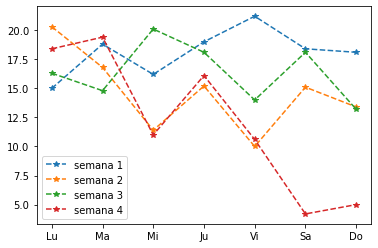

In [40]:
# grafiquemos en 2D
ax = plt.figure().add_subplot()
ax.plot(delta_mes[0], '*--', label='semana 1')
ax.plot(delta_mes[1], '*--', label='semana 2')
ax.plot(delta_mes[2], '*--', label='semana 3')
ax.plot(delta_mes[3], '*--', label='semana 4')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6], ['Lu', 'Ma', 'Mi', 'Ju', 'Vi', 'Sa', 'Do'] )
ax.legend()
plt.show()

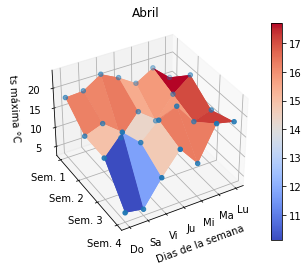

In [83]:
# ESCRIBA AQUÍ SU CÓDIGO
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 2, 3, 4]
X, Y = np.meshgrid(x, y)
Z = np.array(delta_mes)

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], ['Lu', 'Ma', 'Mi', 'Ju', 'Vi', 'Sa', 'Do'] )
ax.set_yticks([1, 2, 3, 4], ['Sem. 1', 'Sem. 2', 'Sem. 3', 'Sem. 4'] )
ax.set_zlabel('ts máxima °C')
ax.set_xlabel('Dias de la semana')
ax.set_title('Abril')
ax.set_zlim(3,24)
ax.view_init(elev=35,azim=60)
plt.colorbar(ax.plot_surface(X,Y,Z, cmap=cm.coolwarm))
ax.scatter3D(X,Y,Z)

plt.show()



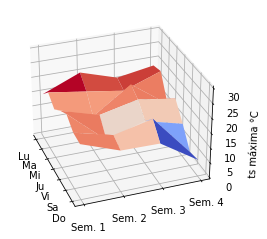

In [58]:
# definimos los arreglos para los ejes
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 2, 3, 4]

# creamos un meshgrid con los datos de los ejes
X, Y = np.meshgrid(x, y)

# y convertimos los datos en una matriz
Z = np.array(delta_mes)

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7], ['Lu', 'Ma', 'Mi', 'Ju', 'Vi', 'Sa', 'Do'] )
ax.set_yticks([1, 2, 3, 4], ['Sem. 1', 'Sem. 2', 'Sem. 3', 'Sem. 4'] )
ax.set_zlabel('ts máxima °C')
ax.set_zlim(0,30)
ax.view_init(elev=30., azim=-20)
plt.show()

In [41]:
type(delta_mes)

list